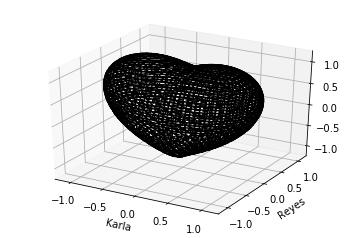

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np


def heart_3d(x,y,z):
   return (x**2+(9/4)*y**2+z**2-1)**3-x**2*z**3-(9/80)*y**2*z**3


def plot_implicit(fn, bbox=(-1.2, 1.2)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 40) # number of slices
    A1, A2 = np.meshgrid(A, A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X, Y = A1, A2
        Z = fn(X, Y, z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z', colors=('black',))
        # [z] defines the only level to plot
        # for this contour for this value of z

    for y in B:  # plot contours in the XZ plane
        X, Z = A1, A2
        Y = fn(X, y, Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y', colors=('black',))

    for x in B: # plot contours in the YZ plane
        Y, Z = A1, A2
        X = fn(x, Y, Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x',colors=('black',))

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin, zmax)
    ax.set_xlim3d(xmin, xmax)
    ax.set_ylim3d(ymin, ymax)
    plt.xlabel("Karla") 
    plt.ylabel("Reyes")
    plt.show()

if __name__ == '__main__':
    plot_implicit(heart_3d)
